In [56]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
from sklearn.tree import export_text
import numpy as np
from sklearn.model_selection import train_test_split as tts

Importação e avaliação preliminar dos dados:

In [57]:
dados = pd.read_excel('CCARDBALANCE.xlsx')
dados.head()

,ID,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia,Gasto Mensal
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [58]:
dados.groupby(dados['Etnia']).first()

,ID,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Gasto Mensal
Etnia,,,,,,,,,,,
African American,7,20.996,3388,259,2,37,12,Female,No,No,203
Asian,2,106.025,6645,483,3,82,15,Female,Yes,Yes,903
Caucasian,1,14.891,3606,283,2,34,11,Male,No,Yes,333


Tratamento

In [59]:
#Transformando coluna Etnia em boolean
#Coluna com três valores possíveis, para evitar sobreajuste criaremos um valor boolean apenas para dois valores

#Função para classificar quem é Caucasiano 
def Caucasiano(arr):
    if arr == 'Caucasian':
        return 1
    else:
        return 0
dados['Caucasiano']=dados['Etnia'].map(Caucasiano)
#Função para classificar quem é Asian
def Asian(arr):
    if arr == 'Asian':
        return 1
    else:
        return 0
dados['Asian']=dados['Etnia'].map(Asian)

In [60]:
#Função para classificar quem usa ou não o cartão
def usa_card(arr):
    if arr == 0:
        return 0
    else:
        return 1
    

In [61]:
#Executando a função para criar um novo array tipo boolean
dados['Usa_card']=dados['Gasto Mensal'].map(usa_card)

In [62]:
#Função para transoformar alguns valores de string para boolean
def string_to_boolean (arr):
    if arr =="Yes":
        return 1
    else: 
        return 0

In [63]:
#Criando coluna Estudante_boolean, para transformar os valores yes/no em 1 ou 0
dados['Estudante_boolean']=dados['Estudante'].map(string_to_boolean)

In [64]:
#Criando coluna Casado_boolean, para transformar os valores yes/no em 1 ou 0
dados['Casado_boolean']=dados['Casado'].map(string_to_boolean)

In [65]:
#Criando coluna para transformar a variável sexo em boolean
def sexo_to_boolean (arr):
    if arr =="Female":
        return 1
    else: 
        return 0
dados['Sexo_boolean']=dados['Sexo'].map(sexo_to_boolean)

In [66]:
dados.head(20)

,ID,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia,Gasto Mensal,Caucasiano,Asian,Usa_card,Estudante_boolean,Casado_boolean,Sexo_boolean
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,1,0,1,0,1,0
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1,1,1,1,1
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0,1,1,0,0,0
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,1,1,0,0,1
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,1,0,1,0,1,0
5,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151,1,0,1,0,0,0
6,7,20.996,3388,259,2,37,12,Female,No,No,African American,203,0,0,1,0,0,1
7,8,71.408,7114,512,2,87,9,Male,No,No,Asian,872,0,1,1,0,0,0
8,9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279,1,0,1,0,0,1
9,10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350,0,0,1,1,1,1


In [67]:
dados['Limite']=dados['Limite'].astype(float)
dados['Rating']=dados['Rating'].astype(float)
dados['Cartoes']=dados['Cartoes'].astype(int)
dados['Idade']=dados['Idade'].astype(int)

Modelagem: 

In [68]:
#Declarando as variáveis preditoras
Variaveis =['Renda','Limite', 'Rating', 'Cartoes', 'Idade', 'Educacao', 'Sexo_boolean', 'Estudante_boolean', 'Casado_boolean', 'Caucasiano', 'Asian']

Número de Folhas:  3
Profundidade:  2
........................................
A acuracia do modelo de definição do perfil é:  0.925


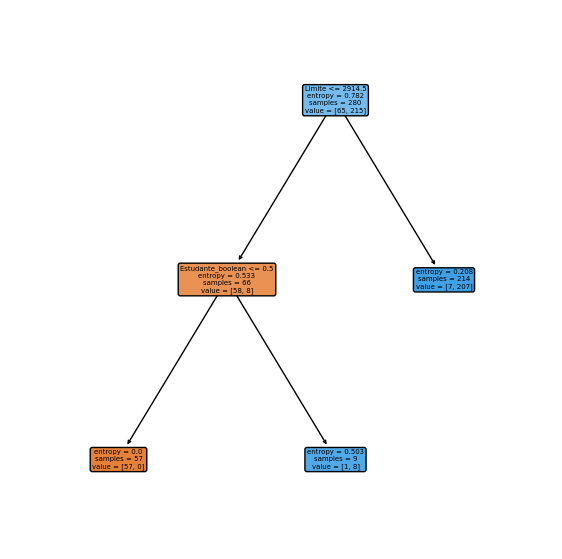

In [82]:
#Dividindo os dados entre treino e teste para validação
np.random.seed(0)
x_treino,  x_valid, y_treino, y_valid = tts(dados[Variaveis], dados['Usa_card'], test_size=0.3)
x_treino.shape, x_valid.shape, y_treino.shape, y_valid.shape

#Modelo definição do perfil: 
modelo_perfil = tree.DecisionTreeClassifier(criterion ='entropy', max_leaf_nodes= 3)
modelo_perfil.fit(x_treino, y_treino)
print("Número de Folhas: ", modelo_perfil.get_n_leaves())
print("Profundidade: ",modelo_perfil.get_depth())
print('........................................')

#Calculando a acuracia
p=modelo_perfil.predict(x_valid)
Acuracia = np.mean(y_valid==p)
print('A acuracia do modelo de definição do perfil é: ', Acuracia)

#Árvore de decisaão perfil
plt.figure( figsize=(7,7),dpi=100)
plot_tree(modelo_perfil,feature_names=Variaveis,  
                      filled=True, rounded=True,fontsize=5.0
                    )
plt.show()

In [73]:
#Selecionando colunas que usam o cartão
dados_usam_card = dados[dados['Usa_card']!=0]
dados_usam_card=dados_usam_card.set_index('ID')
dados_usam_card

,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia,Gasto Mensal,Caucasiano,Asian,Usa_card,Estudante_boolean,Casado_boolean,Sexo_boolean
ID,,,,,,,,,,,,,,,,,
1,14.891,3606.0,283.0,2,34,11,Male,No,Yes,Caucasian,333,1,0,1,0,1,0
2,106.025,6645.0,483.0,3,82,15,Female,Yes,Yes,Asian,903,0,1,1,1,1,1
3,104.593,7075.0,514.0,4,71,11,Male,No,No,Asian,580,0,1,1,0,0,0
4,148.924,9504.0,681.0,3,36,11,Female,No,No,Asian,964,0,1,1,0,0,1
5,55.882,4897.0,357.0,2,68,16,Male,No,Yes,Caucasian,331,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,49.794,5758.0,410.0,4,40,8,Male,No,No,Caucasian,734,1,0,1,0,0,0
396,12.096,4100.0,307.0,3,32,13,Male,No,Yes,Caucasian,560,1,0,1,0,1,0
397,13.364,3838.0,296.0,5,65,17,Male,No,No,African American,480,0,0,1,0,0,0


In [74]:
#Declarando as variáveis preditoras
Variaveis =['Renda','Limite', 'Rating', 'Cartoes', 'Idade', 'Educacao', 'Sexo_boolean', 'Estudante_boolean', 'Casado_boolean', 'Caucasiano', 'Asian']

Número de Folhas:  8
Profundidade:  4
........................................
A acuracia do modelo de predição de gasto é:  0.7343562647112738


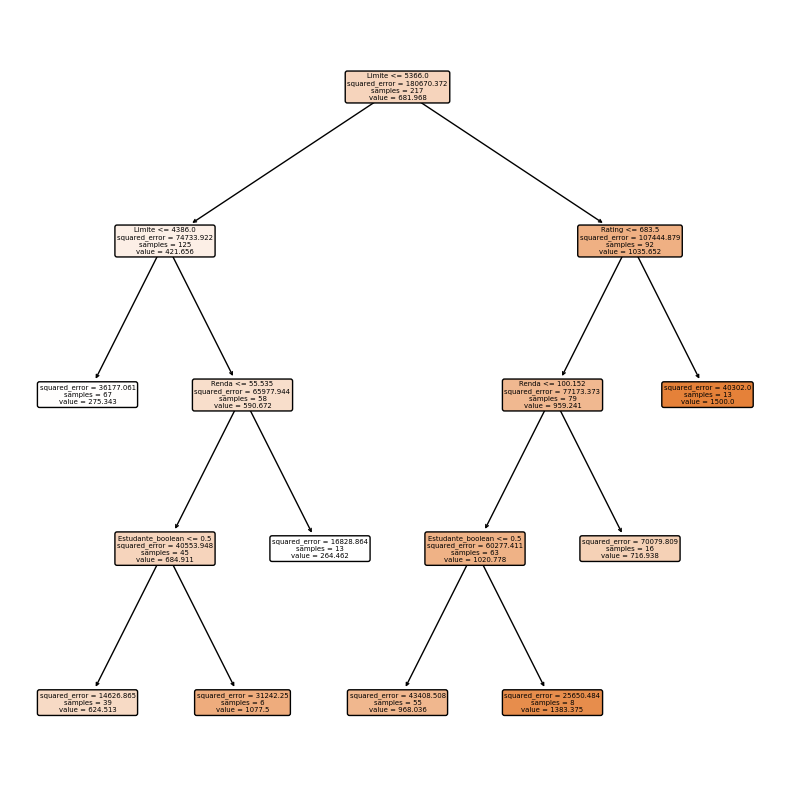

In [84]:
#Dividindo os dados entre treino e teste para validação
np.random.seed(0)
x_treino,  x_valid, y_treino, y_valid = tts(dados_usam_card[Variaveis], dados_usam_card['Gasto Mensal'], test_size=0.3)
x_treino.shape, x_valid.shape, y_treino.shape, y_valid.shape

#Modelo prever os gastos: 
modelo_gasto = tree.DecisionTreeRegressor(max_leaf_nodes= 8)
modelo_gasto.fit(x_treino, y_treino)
print("Número de Folhas: ", modelo_gasto.get_n_leaves())
print("Profundidade: ",modelo_gasto.get_depth())
print('........................................')

#Calculando a acurácia com R²
Acuracia_gasto = modelo_gasto.score(x_valid, y_valid)
print('A acuracia do modelo de predição de gasto é: ', Acuracia_gasto)

#Árvore de decisão gasto
plt.figure( figsize=(10,10),dpi=100)
plot_tree(modelo_gasto,feature_names=Variaveis,  
                      filled=True, rounded=True,fontsize=5.0
                    )
plt.show()